### AUTHOR : VAISHNAV KRISHNA P
#### DATASET : https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv

In [54]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Loading the dataset
dataset = pd.read_csv("Churn_Modelling.csv")

In [56]:
# first 5 records
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# Removing the unwanted features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13] # tabget feature

In [60]:
# Categorical features has to handled
categorical_features = [feature for feature in X.columns if X[feature].dtype == "O"]
categorical_features

['Geography', 'Gender']

In [65]:
# applying the dummy encoding
geogrphy = pd.get_dummies(dataset.Geography, prefix="country_", drop_first=True)
gender = pd.get_dummies(dataset.Gender, drop_first=True)

In [66]:
# Concatinating the dataframes
X.drop(columns=["Gender", "Geography"], axis = 1, inplace=True) # column wise
X = pd.concat([X, geogrphy, gender], axis = 1) # column wise concatination

In [68]:
# splitting the training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [69]:
# shape of the trining and testing datset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [70]:
# scaling the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
# Creating ANN model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout # avoid overfitting
from keras.layers import ReLU, LeakyReLU, ELU

In [112]:
# Creating model ANN
classifier = Sequential()

classifier.add(Dense(units = 11, activation = ReLU())) # input layer

classifier.add(Dense(units = 9, activation = ReLU())) # 1st hidden layer
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 6, activation = ReLU())) # 2nd hidden layer
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1, activation = 'sigmoid')) # output layer

In [113]:
# compiling the model
classifier.compile(
    optimizer = "Adam",
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [114]:
# early stopping
import keras

early_stopping = keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.001,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [115]:
model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=100,
                               validation_split=0.33 , callbacks = early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7701 - loss: 0.5864 - val_accuracy: 0.7910 - val_loss: 0.4635
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7970 - loss: 0.4812 - val_accuracy: 0.8008 - val_loss: 0.4405
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8170 - loss: 0.4294 - val_accuracy: 0.8084 - val_loss: 0.4271
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8137 - loss: 0.4266 - val_accuracy: 0.8228 - val_loss: 0.4119
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8249 - loss: 0.4104 - val_accuracy: 0.8296 - val_loss: 0.4010
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8260 - loss: 0.4038 - val_accuracy: 0.8334 - val_loss: 0.3967
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8221 - loss: 0.3956 - val_accuracy: 0.8349 - val_loss: 0.3900
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8356 - loss: 0.3873 - val_accu

In [117]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

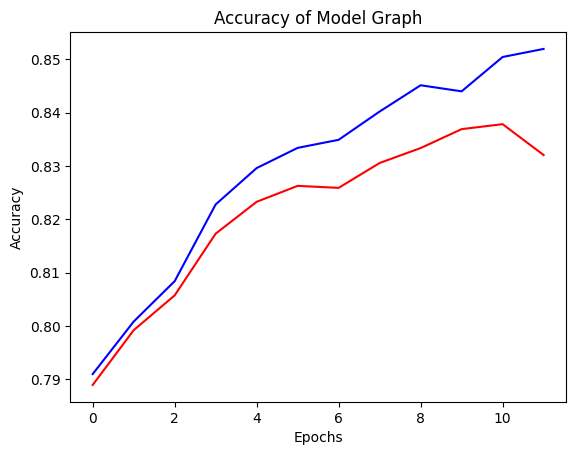

In [120]:
# Diagrams Accuracy
plt.title("Accuracy of Model Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(model_history.history['accuracy'], color='r')
plt.plot(model_history.history['val_accuracy'], color ='blue')
plt.show()

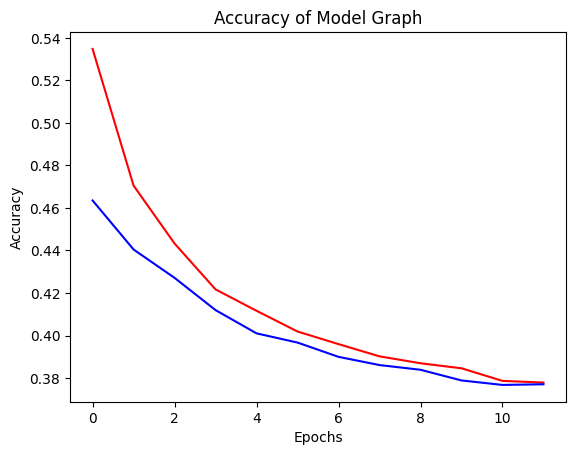

In [121]:
# Diagrams
plt.title("Accuracy of Model Graph")
plt.plot(model_history.history['loss'], color='r')
plt.plot(model_history.history['val_loss'], color ='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [122]:
# Model predictions
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [127]:
# Boolean value
y_pred = y_pred > 0.5

In [128]:
### Evaluation of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred) # accuracy score

0.858

In [129]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[1538,   69],
       [ 215,  178]])

In [130]:
# To get all the weights
classifier.get_weights()

[array([[-0.06361066,  0.27017963, -0.03399954,  0.04272142,  0.07191691,
          0.27614197,  0.32099444,  0.19793619,  0.09577145,  0.11136132,
          0.03555646],
        [-0.8013816 , -0.1694893 , -0.6297966 , -0.57690233, -0.22690596,
          0.27942237,  0.4680105 , -0.41057882,  0.29485252, -1.0641632 ,
          0.24392575],
        [ 0.15630504, -0.03507693, -0.20180945, -0.284436  ,  0.07908777,
         -0.04695548,  0.25505686,  0.05900459, -0.0165534 ,  0.29466558,
          0.15214455],
        [-0.03360268,  0.326548  , -0.05640386, -0.55142874,  0.43985352,
          0.07335562, -0.1402054 , -0.12280369,  0.28453028,  0.48102894,
         -0.18454617],
        [ 0.20194264,  0.46461195,  0.0332715 ,  0.35566694,  0.09290768,
         -0.6102254 , -0.15436724,  0.05438787,  1.0960969 ,  0.1397734 ,
         -1.0856988 ],
        [ 0.3163774 , -0.23233882, -0.02692545,  0.25311387,  0.5814467 ,
          0.09849527,  0.11838033, -0.47372004, -0.13088745, -0.4508156